**This notebook is an exercise in the [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/scaling-and-normalization).**

---


In this exercise, you'll apply what you learned in the **Scaling and normalization** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex2 import *
print("Setup Complete")

Setup Complete


# Get our environment set up

To practice scaling and normalization, we're going to use a [dataset of Kickstarter campaigns](https://www.kaggle.com/kemical/kickstarter-projects). (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

The next code cell loads in the libraries and dataset we'll be using. 

In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Let's start by scaling the goals of each campaign, which is how much money they were asking for.  After scaling, all values lie between 0 and 1.

In [3]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


# 1) Practice scaling

We just scaled the "usd_goal_real" column. What about the "goal" column?

Begin by running the code cell below to create a DataFrame `original_goal_data` containing the "goal" column.

In [4]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

Use `original_goal_data` to create a new DataFrame `scaled_goal_data` with values scaled between 0 and 1. You must use the `minmax_scaling()` function.

In [5]:
# TODO: Your code here
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

# Check your answer
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [6]:
# Lines below will give you a hint or solution code
#q1.hint()
#q1.solution()

# 2) Practice normalization

Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

In [7]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0
#print(index_of_positive_pledges)

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]
#print(positive_pledges)

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


The values have changed significantly with normalization!

In the next code cell, you'll take a look at the distribution of the normalized data, where it should now resemble a normal distribution.

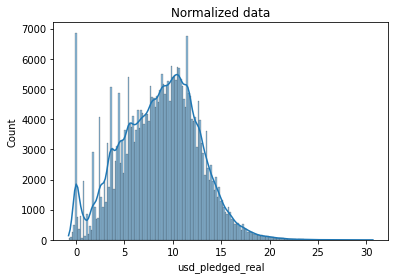

In [8]:
# plot normalized data
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()

We used the "usd_pledged_real" column. Follow the same process to normalize the "pledged" column. 

Text(0.5, 1.0, 'Normalized data')

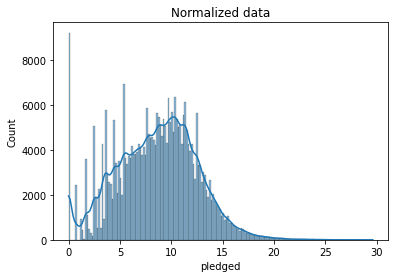

In [9]:
# TODO: Your code here!
index_pos_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
pos_pledges = kickstarters_2017.pledged.loc[index_pos_pledges]

# normalize the pledges (w/ Box-Cox)
norm_pledges = pd.Series(stats.boxcox(pos_pledges)[0], 
                               name='pledged', index=pos_pledges.index)

# plot normalized data
ax = sns.histplot(norm_pledges, kde=True)
ax.set_title("Normalized data")

How does the normalized "usd_pledged_real" column look different from when we normalized the "pledged" column?  Or, do they look mostly the same?

Once you have an answer, run the code cell below.

In [10]:
# Check your answer (Run this code cell to receive credit!)
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The distributions in the normalized data look mostly the same.

In [11]:
# Line below will give you a hint
q2.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> 
Try running this code:

```python
# get the index of all positive pledges (Box-Cox only takes positive values)
index_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges_only = kickstarters_2017.pledged.loc[index_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_values = pd.Series(stats.boxcox(positive_pledges_only)[0], 
                              name='pledged', index=positive_pledges_only.index)

# plot normalized data
ax = sns.histplot(normalized_values, kde=True)
ax.set_title("Normalized data")
```



# (Optional) More practice

Try finding a new dataset and pretend you're preparing to perform a [regression analysis](https://www.kaggle.com/rtatman/the-5-day-regression-challenge). 

[These datasets are a good start!](https://www.kaggle.com/rtatman/datasets-for-regression-analysis)

Pick three or four variables and decide if you need to normalize or scale any of them and, if you think you should, practice applying the correct technique.

# Keep going

In the next lesson, learn how to [**parse dates**](https://www.kaggle.com/alexisbcook/parsing-dates) in a dataset.

In [12]:
weather_Szeged = pd.read_csv("../input/szeged-weather/weatherHistory.csv")
print(weather_Szeged.columns)
weather_Szeged.head()

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-cleaning/discussion) to chat with other learners.*

In [13]:
# select the temperature column
work_data = pd.DataFrame(weather_Szeged[['Temperature (C)']])


In [14]:
# new DF with scaled col
scaled_temp_data = minmax_scaling(work_data, columns=['Temperature (C)'])

original_weather_Szeged = pd.DataFrame(weather_Szeged[['Temperature (C)']])

print('Original data\nPreview:\n', original_weather_Szeged.head())
print('Minimum value:', float(original_weather_Szeged.min()),
      '\nMaximum value:', float(original_weather_Szeged.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_temp_data.head())
print('Minimum value:', float(scaled_temp_data.min()),
      '\nMaximum value:', float(scaled_temp_data.max()))

Original data
Preview:
    Temperature (C)
0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
Minimum value: -21.822222222222223 
Maximum value: 39.90555555555555
______________________________

Scaled data
Preview:
    Temperature (C)
0         0.506975
1         0.505085
2         0.505445
3         0.487805
4         0.495365
Minimum value: 0.0 
Maximum value: 1.0


In [15]:
# get the index of all positive apparent temperatures (Box-Cox only takes positive values)
index_of_positive_apptemps = weather_Szeged[['Apparent Temperature (C)']] > 0
#print(index_of_positive_apptemps)

# get only positive apparent temperatures (using their indexes)
positive_apptemps = weather_Szeged[['Apparent Temperature (C)']].loc[index_of_positive_apptemps['Apparent Temperature (C)']]

# normalize the apparent temperatures (w/ Box-Cox)
normalized_apptemps = pd.Series(stats.boxcox(positive_apptemps[['Apparent Temperature (C)']].to_numpy().flatten())[0], 
                               name='apparent_temps_C', index=positive_apptemps.index)


print('Original data\nPreview:\n', positive_apptemps.head())
print('Minimum value:', float(positive_apptemps.min()),
      '\nMaximum value:', float(positive_apptemps.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_apptemps.head())
print('Minimum value:', float(normalized_apptemps.min()),
      '\nMaximum value:', float(normalized_apptemps.max()))

Original data
Preview:
    Apparent Temperature (C)
0                  7.388889
1                  7.227778
2                  9.377778
3                  5.944444
4                  6.977778
Minimum value: 0.0055555555555544 
Maximum value: 39.34444444444444
______________________________

Normalized data
Preview:
 0    4.213390
1    4.129623
2    5.202859
3    3.438678
4    3.998413
Name: apparent_temps_C, dtype: float64
Minimum value: -1.4442972655572976 
Maximum value: 16.032567630248725


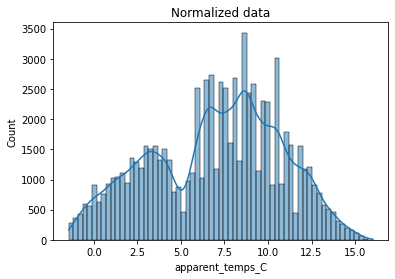

In [16]:
# plot normalized data
ax = sns.histplot(normalized_apptemps, kde=True)
ax.set_title("Normalized data")
plt.show()